In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
MODEL_FIXER = {
    'simclr': 'SimCLR',
    'simclr-affine': 'SimCLR + Affine',
    'byol': 'BYOL',
    'byol-affine': 'BYOL + Affine',
    'barlow_twins': 'Barlow Twins',
    'barlow_twins-affine': 'Barlow Twins + Affine',
}

DATASET_FIXER = {
    'cifar10': 'CIFAR10',
    'cifar100': 'CIFAR100',
    'caltech101': 'Caltech101',
}

In [74]:
df = pd.read_csv('epoch-results.csv')
df['model'] = df['model'].map(lambda x: MODEL_FIXER[x])
df['dataset'] = df['dataset'].map(lambda x: DATASET_FIXER[x])
df = df.rename(columns={'model': 'Model', 'epoch': 'Epoch', 'dataset': 'Dataset', 'metric': 'Accuracy'})

In [75]:
df

,Model,Epoch,Dataset,Accuracy
0,SimCLR,0,CIFAR10,32.36
1,SimCLR,0,CIFAR100,11.90
2,SimCLR,0,Caltech101,33.79
3,SimCLR,10,CIFAR10,43.85
4,SimCLR,10,CIFAR100,18.07
...,...,...,...,...
175,Barlow Twins + Affine,80,CIFAR100,24.53
176,Barlow Twins + Affine,80,Caltech101,54.73
177,Barlow Twins + Affine,90,CIFAR10,50.40
178,Barlow Twins + Affine,90,CIFAR100,24.90


In [80]:
dff = df.groupby(by=['Model', 'Epoch', 'Dataset'], as_index=False).agg({'Accuracy': 'mean'})

In [81]:
dff

,Model,Epoch,Dataset,Accuracy
0,BYOL,0,CIFAR10,23.42
1,BYOL,0,CIFAR100,5.99
2,BYOL,0,Caltech101,22.32
3,BYOL,10,CIFAR10,37.77
4,BYOL,10,CIFAR100,10.70
...,...,...,...,...
175,SimCLR + Affine,80,CIFAR100,28.40
176,SimCLR + Affine,80,Caltech101,61.58
177,SimCLR + Affine,90,CIFAR10,55.03
178,SimCLR + Affine,90,CIFAR100,28.73


In [86]:
def plot_results_for_model(model):
    results = dff.query(f'Model == "{model}" or Model == "{model} + Affine"')

    ax = sns.lineplot(
        data=results.query(f'Model == "{model}"'),
        x='Epoch', y='Accuracy', hue='Dataset',
        palette={'CIFAR10': 'red', 'CIFAR100': 'limegreen', 'Caltech101': 'cyan'}
    )
    for i in range(len(ax.lines)): 
        ax.lines[i].set_linestyle("--")
    
    ax = sns.lineplot(
        data=results.query(f'Model == "{model} + Affine"'),
        x='Epoch', y='Accuracy', hue='Dataset', ax=ax, legend=False,
        palette={'CIFAR10': 'red', 'CIFAR100': 'limegreen', 'Caltech101': 'cyan'},
    )
    
    plt.show()

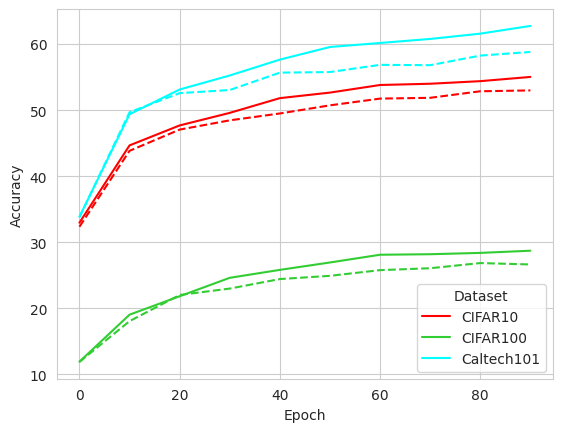

In [87]:
plot_results_for_model("SimCLR")

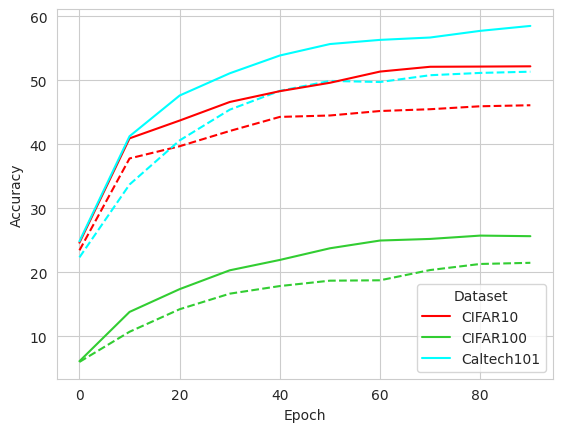

In [88]:
plot_results_for_model("BYOL")

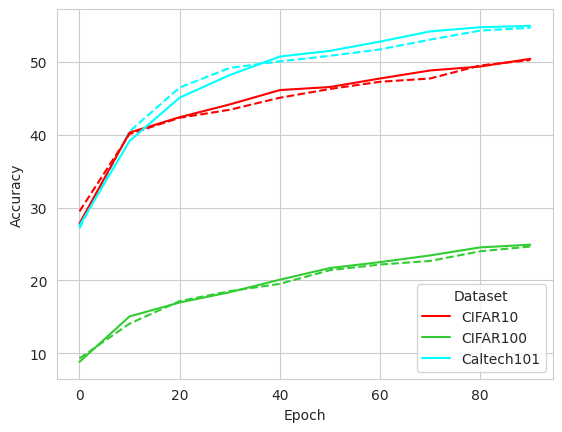

In [89]:
plot_results_for_model("Barlow Twins")